In [59]:
# Import library
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt

In [60]:
# Read data
X, y = fetch_openml('mnist_784', version=1, return_X_y=True)
print('Overall # of samples is', y.shape[0])
print('Size of the features is:', X.shape)

Overall # of samples is 70000
Size of the features is: (70000, 784)


In [66]:
X[1].shape

(784,)

In [62]:
y

array(['5', '0', '4', ..., '4', '5', '6'], dtype=object)

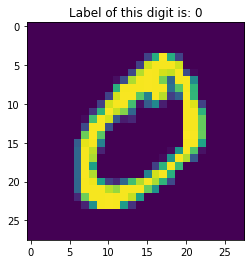

In [63]:
# Plot one sample of dataset
def show_digit(x_vec, label):
    x_mat = x_vec.reshape(28, 28)
    plt.imshow(x_mat)
    plt.title('Label of this digit is: ' + label)
    plt.show()

show_digit(X[1], y[1])

In [5]:
n_train = 8000
n_test = 2000
split_loc = 10000 # train and test split at location of 10k

X_train, y_train = X[:n_train,:], y[:n_train] # train data [0:8000]
X_test, y_test = X[split_loc:split_loc + n_test, :] , y[split_loc:split_loc+n_test] # test data[10k:12k]

In [6]:
# converting the above numpy arrays to pandas dataframe
df_train = pd.DataFrame(X_train)
df_test = pd.DataFrame(X_test)

In [7]:
y_train_df = pd.DataFrame(data = y_train, columns = ['class'])
y_test_df = pd.DataFrame(data = y_test, columns = ['class'])

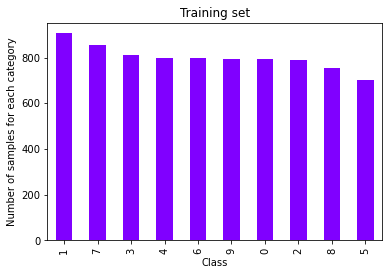

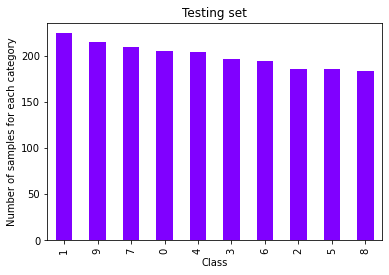

In [64]:
# plot the number of sample for each category in Training and Testing

y_train_df['class'].value_counts().plot(kind = 'bar', colormap = 'rainbow')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Training set')
plt.show()

y_test_df['class'].value_counts().plot(kind = 'bar', colormap = 'rainbow')
plt.xlabel('Class')
plt.ylabel('Number of samples for each category')
plt.title('Testing set')
plt.show()

# code for performing knn classification

In [12]:
# calculate euclidean distance
def dist(x,y):   
    return np.sqrt(np.sum((x-y)**2))

In [13]:
train_distance_list = [] # a list to store euclidean distance

train_ind_counter = [] # a list to store index

k_values = [1, 2, 4, 5, 16, 32] # a list with all the K values

# creating a list of list for storing the predictions for each value of K
train_pred_lists = [[] for _ in range(len(k_values))]

### Training the knn model

In [14]:
# iterating through the training set
for i in range(0,8000):
    train_vec_one = df_train.iloc[i]
    # iterating through the training set
    for j in range(0,8000):
        train_vec = df_train.iloc[j]
        # calculate euclidean distance by calling function dist
        euclidean_dist = dist(train_vec_one,train_vec)
        train_distance_list.append(euclidean_dist)
        # increment the index
        train_ind_counter.append(j)
    
    # dictionary to store all the results
    d = {'index':train_ind_counter, 'distance': train_distance_list}
    # convert dictionary to dataframe
    df = pd.DataFrame(d, columns = ['index', 'distance'])
    # sort in ascending order by euclidean distance
    df_sorted = df.sort_values(by = 'distance')

    # iterate through each value of K
    for K in range(len(k_values)):
        index_list = list(df_sorted['index'][:k_values[K]])
        distance = list(df_sorted['distance'][:k_values[K]])
        res_list = [y_train[i] for i in index_list]
        # now get the count of the max class in result list
        pred_value = max(res_list,key=res_list.count)
        # storing every prediction for K in respective list
        train_pred_lists[K].append(pred_value)
    
    # reinitialize the list
    train_ind_counter = []
    train_distance_list = []

In [15]:
test_distance_list = [] # a list to store euclidean distance

test_ind_counter = [] # a list to store index

# creating a list of list for storing the predictions for each value of K
test_pred_lists = [[] for _ in range(len(k_values))]

### testing the knn model

In [16]:
# iterating through the test set
for i in range(0,2000):
    test_vec = df_test.iloc[i]
    # iterating through the training set
    for j in range(0,8000): 
        train_vec = df_train.iloc[j]
        # calculate euclidean distance
        euclidean_dist = dist(test_vec,train_vec)
        test_distance_list.append(euclidean_dist)
        # increment the index
        test_ind_counter.append(j)
    
    # dictionary to store all the results
    d = {'index':test_ind_counter, 'distance': test_distance_list}
    # convert dictionary to dataframe
    df = pd.DataFrame(d, columns = ['index', 'distance'])
    # sort in ascending order by euclidean distance
    df_sorted = df.sort_values(by = 'distance')

    # iterate through each value of K
    for K in range(len(k_values)):
        index_list = list(df_sorted['index'][:k_values[K]])
        distance = list(df_sorted['distance'][:k_values[K]])
        res_list = [train_pred_lists[K][ind] for ind in index_list]
        # now get the count of the max class in result list
        pred_value = max(res_list,key=res_list.count)
        # storing every prediction in respective list
        test_pred_lists[K].append(pred_value)
        
    # reinitialize the list   
    test_ind_counter = []
    test_distance_list = []

In [17]:
# calculating results for train set
train_pred = 0
train_pred_result = []
for K in range(len(k_values)):
    # element wise comparison to find the accuracy
    for l1,l2 in zip(train_pred_lists[K], y_train.tolist()):
        if l1 == l2:
            # increment when there is a match
            train_pred += 1
    accuracy = train_pred/8000
    train_pred_result.append((round(accuracy*100,2)))
    print('The train accuracy is '+str(round(accuracy*100,2))+'% for K='+str(k_values[K]))
    train_pred = 0

The train accuracy is 100.0% for K=1
The train accuracy is 100.0% for K=2
The train accuracy is 97.95% for K=4
The train accuracy is 97.1% for K=5
The train accuracy is 94.89% for K=16
The train accuracy is 93.04% for K=32


In [19]:
#calculating results for test set
test_pred = 0
test_pred_result = []
for K in range(len(k_values)):
    for l1,l2 in zip(test_pred_lists[K], y_test.tolist()):
        if l1 == l2:
            test_pred += 1
    accuracy = test_pred/2000
    test_pred_result.append((round(accuracy*100,2)))
    print('The test accuracy is '+str(accuracy*100)+'% for K='+str(k_values[K]))
    test_pred = 0

The test accuracy is 94.55% for K=1
The test accuracy is 94.55% for K=2
The test accuracy is 94.85% for K=4
The test accuracy is 94.45% for K=5
The test accuracy is 92.80000000000001% for K=16
The test accuracy is 90.60000000000001% for K=32


In [20]:
# getting all the results for train and test in a dataframe
df_result = pd.DataFrame()
df_result['K value'] = k_values
df_result['train pred'] = train_pred_result
df_result['test pred'] = test_pred_result
df_result

,K value,train pred,test pred
0,1,100.00,94.55
1,2,100.00,94.55
2,4,97.95,94.85
3,5,97.10,94.45
4,16,94.89,92.80
5,32,93.04,90.60


### plot the curve of Training and Testing accuracy with different K values

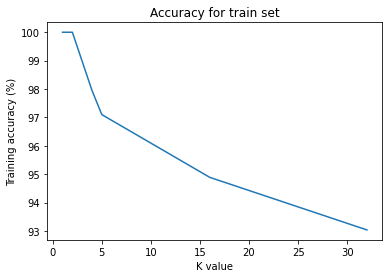

In [22]:
plt.plot(df_result['K value'], df_result['train pred'])
plt.xlabel('K value')
plt.ylabel('Training accuracy (%)')
plt.title('Accuracy for train set')
plt.show()

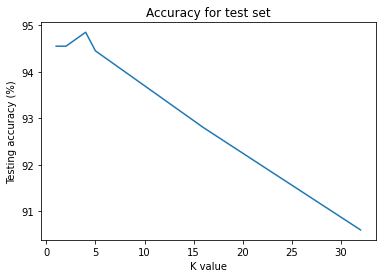

In [23]:
plt.plot(df_result['K value'], df_result['test pred'])
plt.xlabel('K value')
plt.ylabel('Testing accuracy (%)')
plt.title('Accuracy for test set')
plt.show()

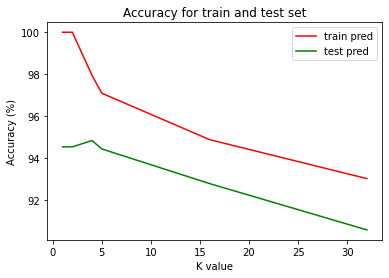

In [24]:
plt.plot(df_result['K value'], df_result['train pred'], 'r', label = 'train pred')
plt.plot(df_result['K value'], df_result['test pred'], 'g', label = 'test pred')
plt.legend(loc='upper right')
plt.xlabel('K value')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for train and test set')
plt.show()